#**Importing the Required Libraries**

In [1]:
import os


In [2]:
import glob

In [3]:
from IPython.display import Image, display

In [4]:
from IPython import display

In [5]:
display.clear_output()

# **In the First Step, We need to check whether we have access to the GPU or not**

In [6]:
!nvidia-smi

Sun Feb 12 05:43:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#**We will clone the OID v4 Toolkit, to download the images from the Open Image Dataset**

In [7]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 11.94 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [8]:
!pwd

/content


In [9]:
%cd /content/OIDv4_ToolKit

/content/OIDv4_ToolKit


In [10]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4.0/4.0 MB 80.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 662.4/662.4 KB 50.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 79.6/79.6 KB 12.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10.4/10.4 MB 53.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 140.6/140.6 KB 20.5 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1

#**Downloading the Pen and Book images**

In [11]:
!python main.py -h

usage: main.py
       [-h]
       [--Dataset /path/to/OID/csv/]
       [-y]
       [--classes list of classes [list of classes ...]]
       [--type_csv 'train' or 'validation' or 'test' or 'all']
       [--sub Subset of human verified images or machine generated h or m)]
       [--image_IsOccluded 1 or 0]
       [--image_IsTruncated 1 or 0]
       [--image_IsGroupOf 1 or 0]
       [--image_IsDepiction 1 or 0]
       [--image_IsInside 1 or 0]
       [--multiclasses 0 (default or 1]
       [--n_threads [default 20]]
       [--noLabels]
       [--limit integer number]
       <command>
       'downloader',
       'visualizer'
       or
       'ill_downloader'.

Open Image
Dataset
Downloader

positional arguments:
  <command> 'downloader', 'visualizer' or 'ill_downloader'.
    'downloader
    ', 'visuali
    zer' or 'il
    l_downloade
    r'.

optional arguments:
  -h, --help
    show this
    help
    message and
    exit
  --Dataset /path/to/OID/csv/
    Directory
    of the OID
    data

In [12]:
!python main.py downloader --classes Pen Book --type_csv all --multiclasses 1 --limit 120


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading ['Pen', 'Book'] together.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] y
...145%, 0 MB, 36137 KB/s, 0 seconds passed
[

In [13]:
!zip -r /content/Dataset.zip /content/OIDv4_ToolKit/OID/Dataset

  adding: content/OIDv4_ToolKit/OID/Dataset/ (stored 0%)
  adding: content/OIDv4_ToolKit/OID/Dataset/train/ (stored 0%)
  adding: content/OIDv4_ToolKit/OID/Dataset/train/Pen_Book/ (stored 0%)
  adding: content/OIDv4_ToolKit/OID/Dataset/train/Pen_Book/5b456c2101d13d9c.jpg (deflated 0%)
  adding: content/OIDv4_ToolKit/OID/Dataset/train/Pen_Book/aadd8c16a40bef5a.jpg (deflated 0%)
  adding: content/OIDv4_ToolKit/OID/Dataset/train/Pen_Book/0ded849413cd1dfc.jpg (deflated 0%)
  adding: content/OIDv4_ToolKit/OID/Dataset/train/Pen_Book/5be562106ab7e281.jpg (deflated 0%)
  adding: content/OIDv4_ToolKit/OID/Dataset/train/Pen_Book/5d3203438d50cf90.jpg (deflated 0%)
  adding: content/OIDv4_ToolKit/OID/Dataset/train/Pen_Book/675ed78210e74c63.jpg (deflated 0%)
  adding: content/OIDv4_ToolKit/OID/Dataset/train/Pen_Book/876541d63816db6e.jpg (deflated 1%)
  adding: content/OIDv4_ToolKit/OID/Dataset/train/Pen_Book/6a147d5ce79612b0.jpg (deflated 0%)
  adding: content/OIDv4_ToolKit/OID/Dataset/train/Pen_Bo

#**Installing Ultralytics using Pip Install**

In [24]:
HOME = '/content/'

In [25]:
print(HOME)

/content/


In [26]:
%cd /content/

/content


In [27]:
!pip install ultralytics==8.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Checking whether YOLOv8 is Installed and its working Fine

In [28]:
import ultralytics

In [29]:
ultralytics.checks()

Ultralytics YOLOv8.0.0 üöÄ Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ‚úÖ (2 CPUs, 12.7 GB RAM, 26.0/78.2 GB disk)


#**Importing the Pen and Book Images Dataset from Roboflow**

In [30]:
!mkdir {HOME}/datasets


mkdir: cannot create directory ‚Äò/content//datasets‚Äô: File exists


In [31]:
!pwd

/content


In [32]:
%cd {HOME}/datasets


/content/datasets


In [33]:
!pwd

/content/datasets


In [35]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xz5TPMNQiWLh0MjY9hwX")
project = rf.workspace("muhammadmoin").project("penbookdetection")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to PenBookDetection-1 in yolov5pytorch:: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1170/1170 [00:00<00:00, 1845.48it/s]


#**Train the YOLOv8 Model on the Custom Dataset**

In [36]:
%cd {HOME}

/content


In [37]:
%cd {dataset.location}

/content/datasets/PenBookDetection-1


In [38]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data=/content/datasets/PenBookDetection/data.yaml epochs=70 imgsz=640

/content
100% 6.23M/6.23M [00:00<00:00, 287MB/s]

yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/PenBookDetection/data.yaml, epochs=70, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.01, momentum

In [39]:
!ls {HOME}//runs/detect/train

args.yaml					     train_batch1561.jpg
confusion_matrix.png				     train_batch1562.jpg
events.out.tfevents.1676184439.e759bda7e9b3.19712.0  train_batch1.jpg
F1_curve.png					     train_batch2.jpg
P_curve.png					     val_batch0_labels.jpg
PR_curve.png					     val_batch0_pred.jpg
predictions.json				     val_batch1_labels.jpg
R_curve.png					     val_batch1_pred.jpg
results.csv					     val_batch2_labels.jpg
results.png					     val_batch2_pred.jpg
train_batch0.jpg				     weights
train_batch1560.jpg


#**Displaying the Confusion Matrix**

/content


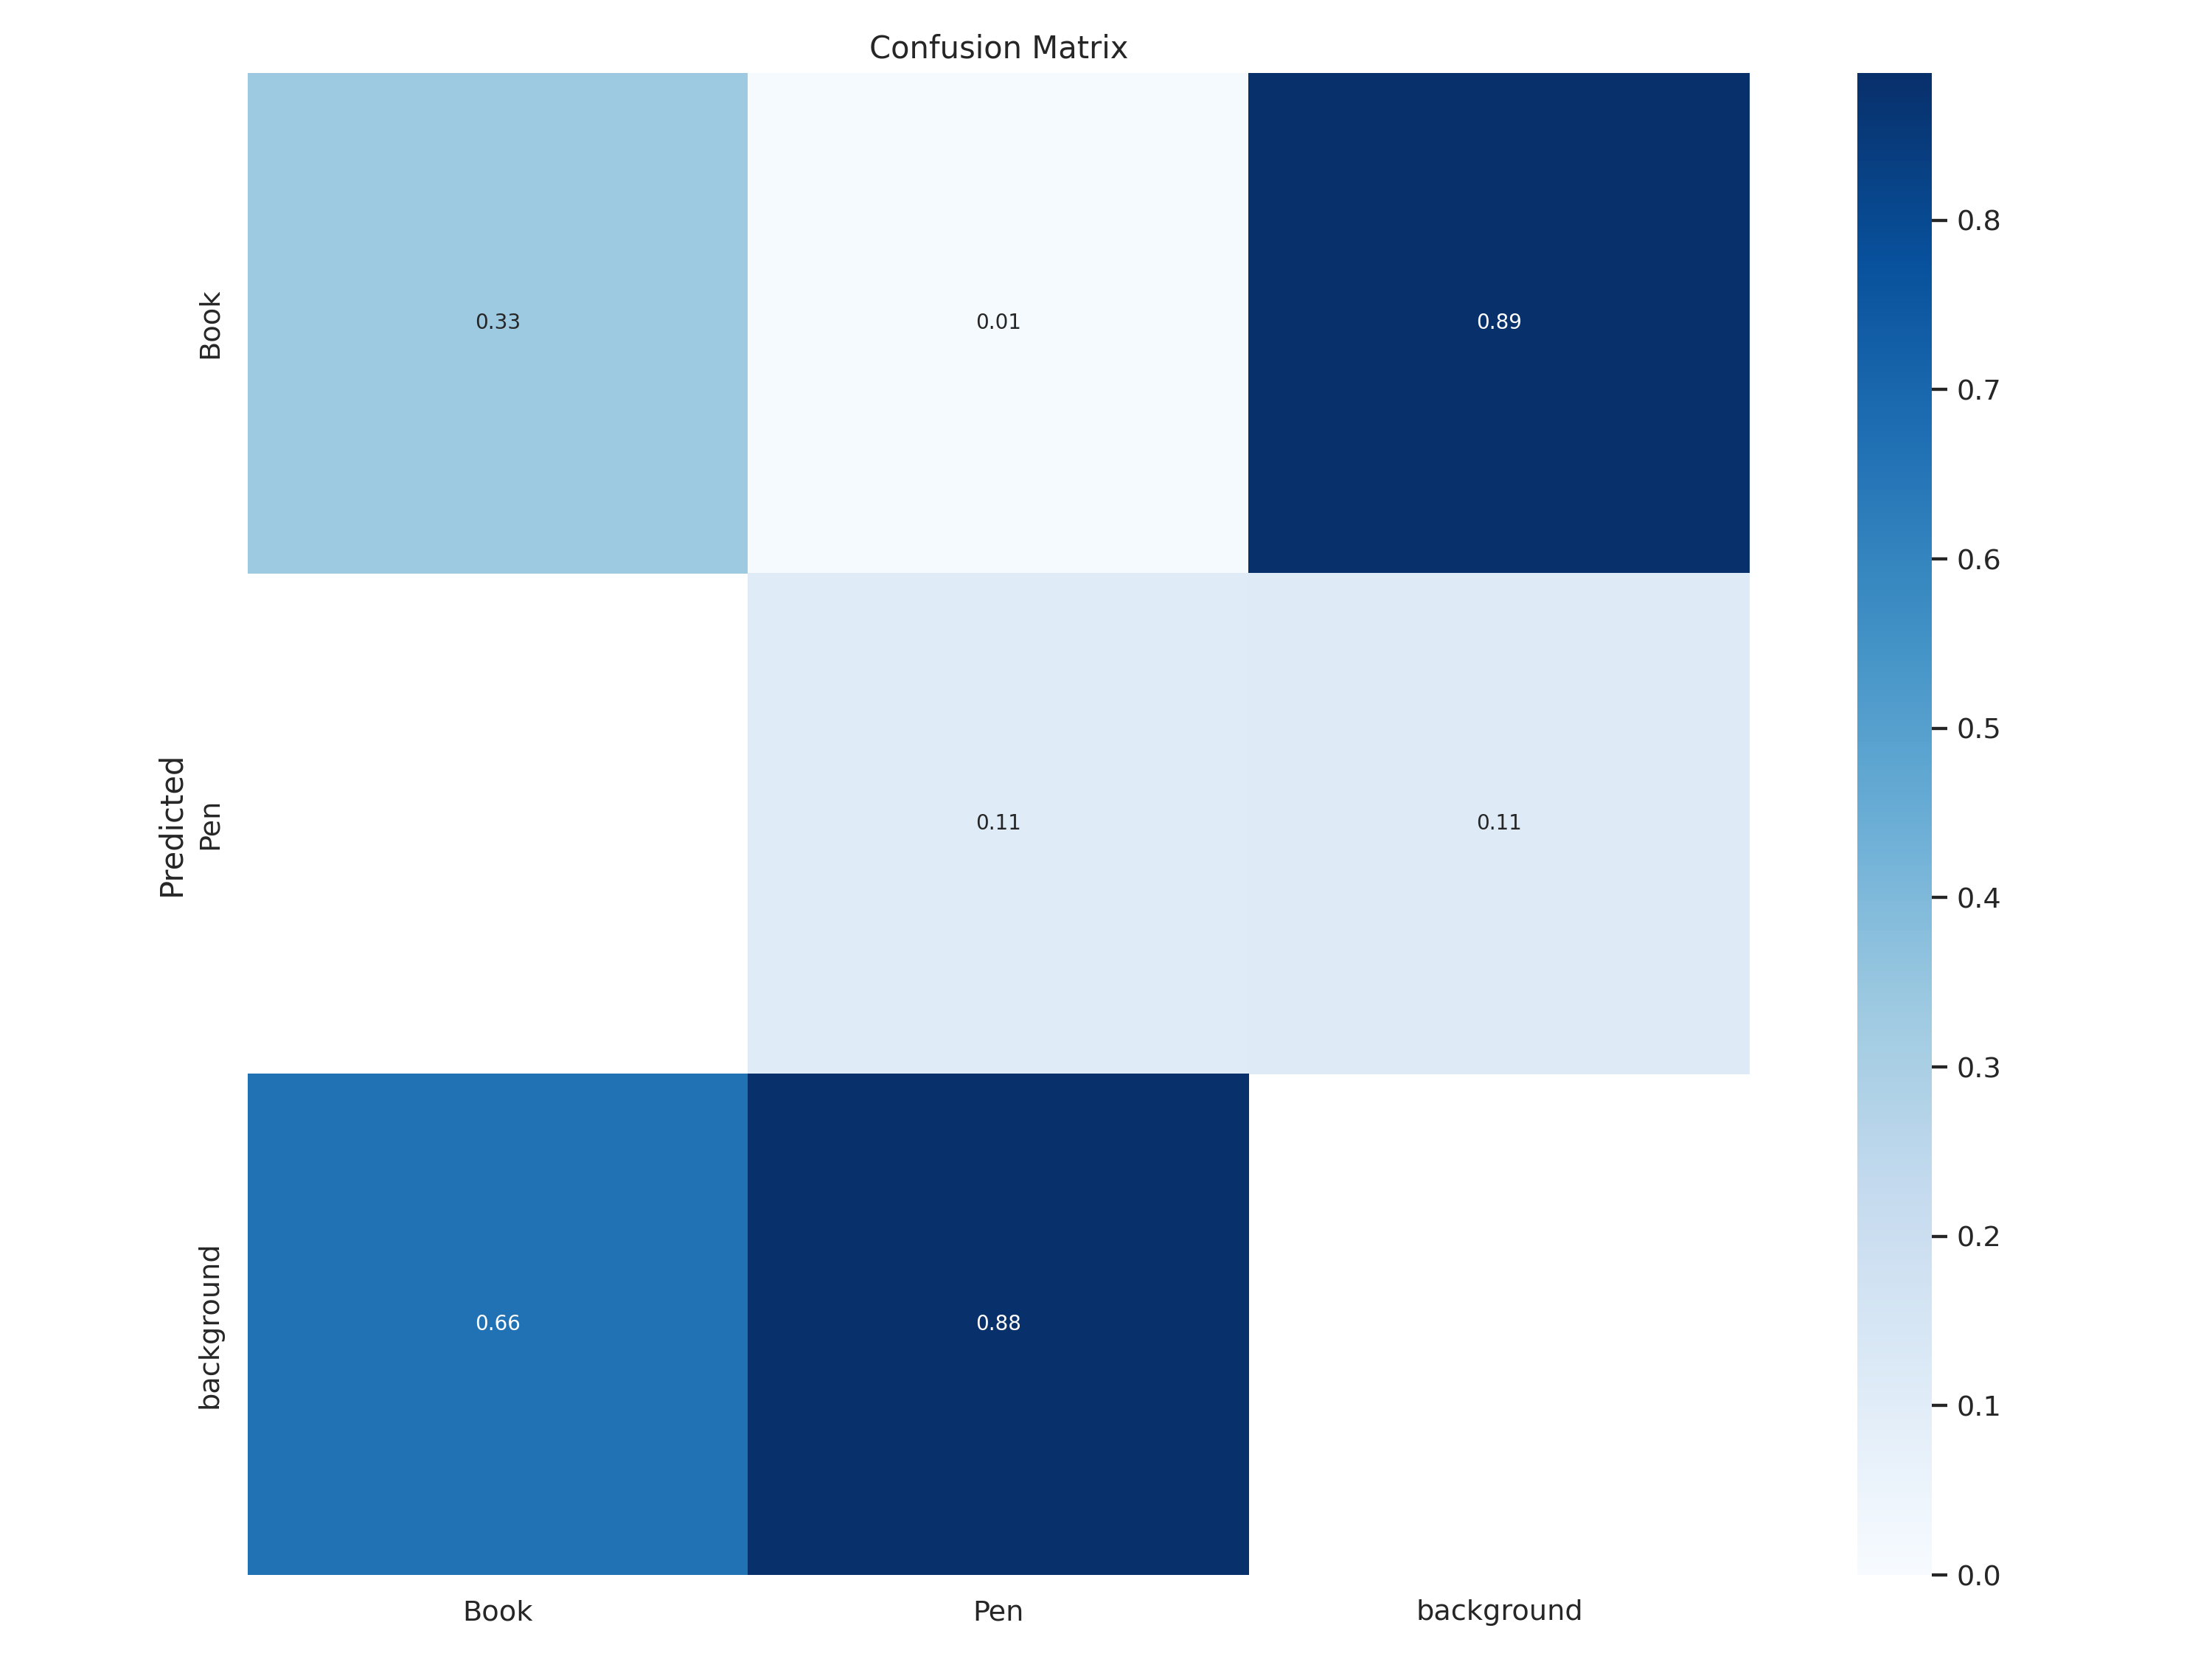

In [40]:
#Confusion matrix is the chart that shows how our model handles different classes
#33% of the times the model detected correctly that this is a Book, while 67% of the time, when the Book is there but the model is not 
#able to detect it
#11% of the time the model is able to detect correctly that there is a pen while 1% the time we get bounding box but pen is incorrectly 
#classified as book while 88% of the time when pen is there but model is unable to detect it 
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=900)

#**Training and Validation Loss**

/content


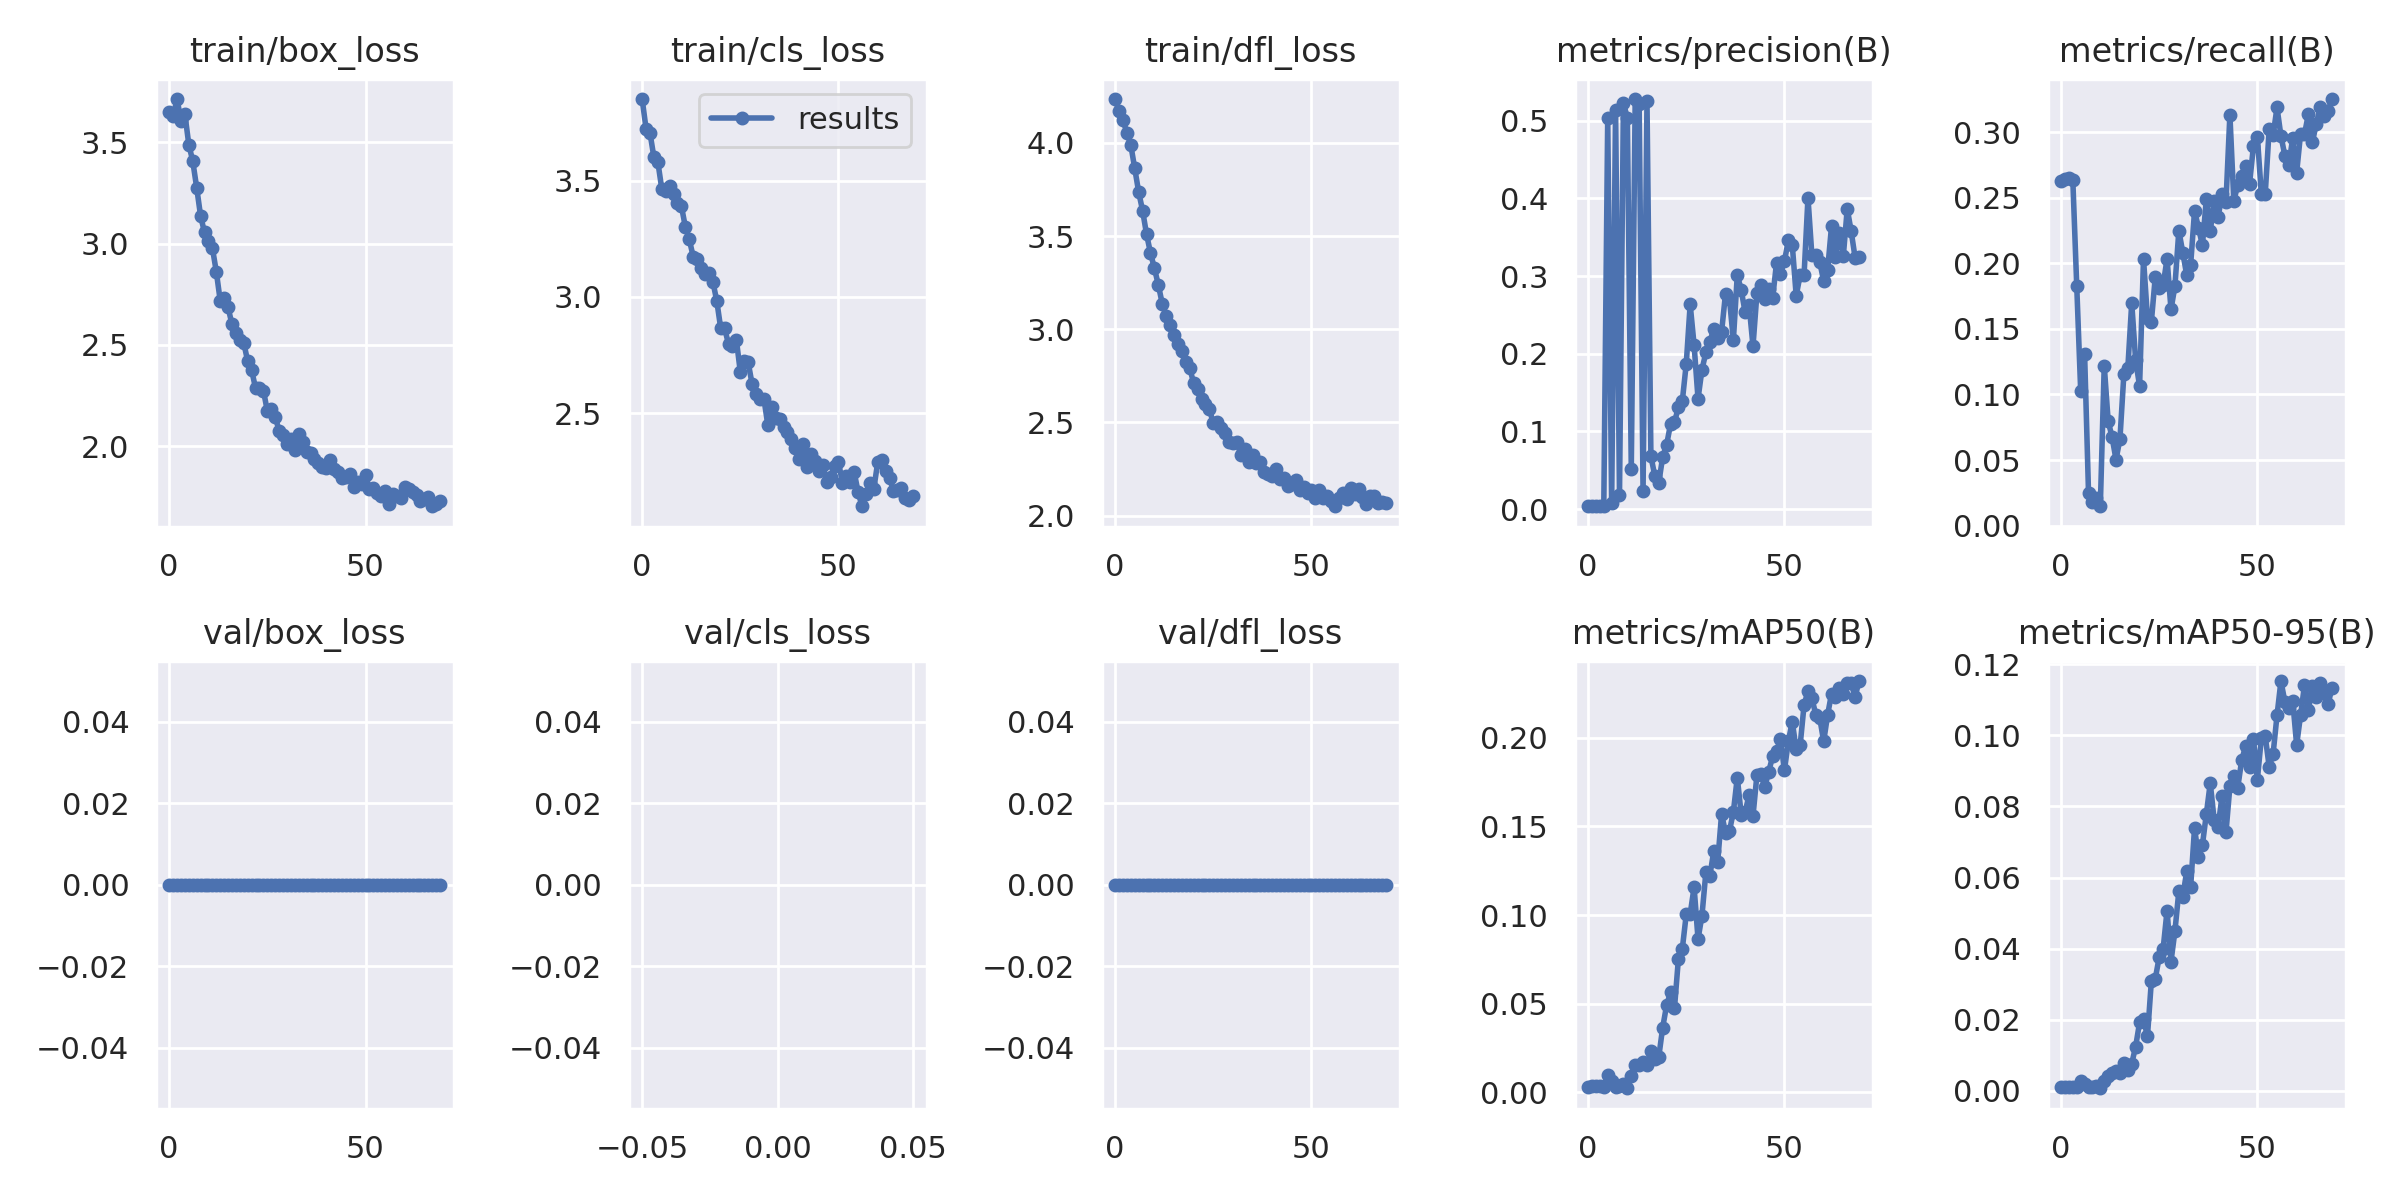

In [42]:
# Here is the graph of the training and validation loss
#box loss and class loss is important 
# The behavior of the model is convincing the model is coverging, Training more will give better results
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


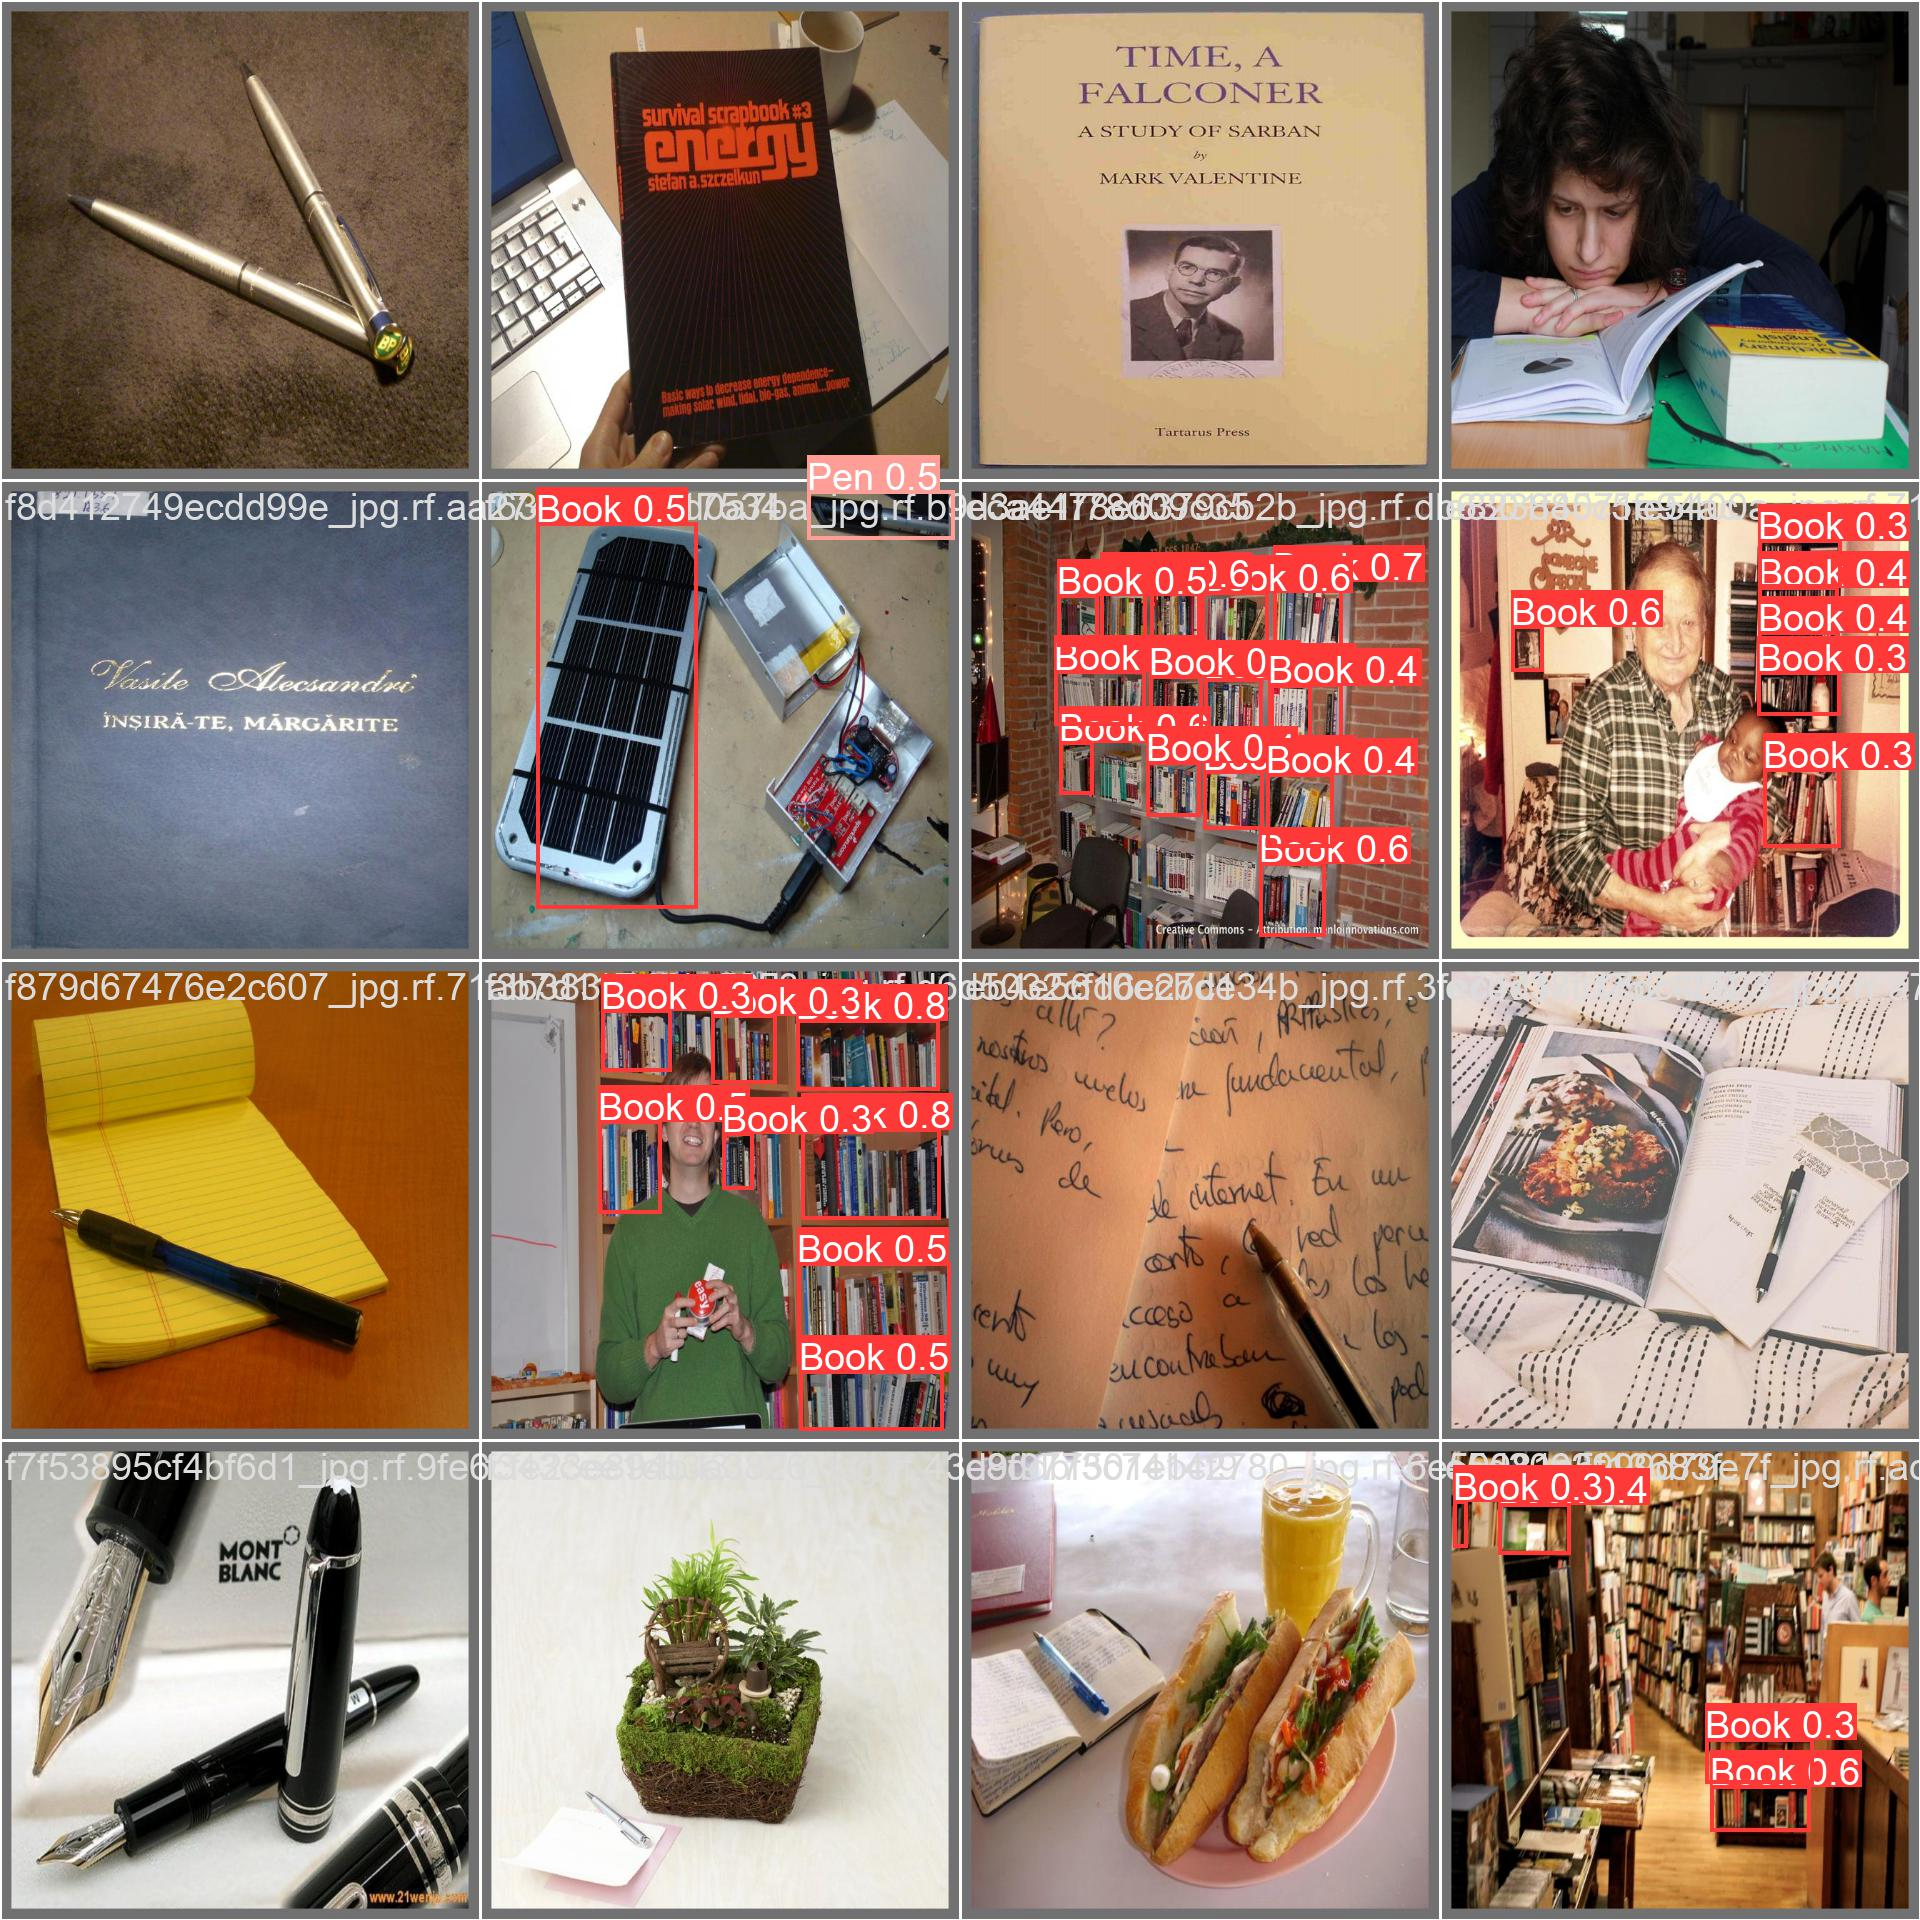

In [44]:
#Model Prediction on validation batch. These image are not used strictly for training so it is always better to take a 
#look and see how model is behaving
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=600)

#**Validate Custom Model**

In [47]:
#Here, we are taking the model best weights and using them to validate the model. Similarly as before we are using 
#CLI to do that, The only difference is our mode = val instead of train
#Validation Script is using test dataset that was not used beforew

%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/datasets/PenBookDetection/data.yaml

/content
Ultralytics YOLOv8.0.0 üöÄ Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/PenBookDetection/valid/labels.cache... 116 images, 0 backgrounds, 0 corrupt: 100% 116/116 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:03<00:00,  2.18it/s]
                   all        116        521        0.4      0.296      0.226      0.115
                  Book        116        408       0.36      0.424      0.295      0.168
                   Pen        116        113       0.44      0.168      0.157     0.0623
Speed: 2.3ms pre-process, 6.4ms inference, 0.0ms loss, 3.0ms post-process per image


#**Inference with Custom Model**

In [48]:
# Testing the Model on Test Dataset images
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/PenBookDetection/test/images

/content
Ultralytics YOLOv8.0.0 üöÄ Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
image 1/58 /content/datasets/PenBookDetection/test/images/000fcbfa875b9eb2_jpg.rf.0e7b6928df67fb41979de809cde16d56.jpg: 640x640 8.9ms
image 2/58 /content/datasets/PenBookDetection/test/images/004d395fc5fc3917_jpg.rf.abc26d80efc6eb5b12c9de2c46e67ee1.jpg: 640x640 9.8ms
image 3/58 /content/datasets/PenBookDetection/test/images/022080e4ade97180_jpg.rf.4e8da3a4cb30f2ca4bd566f3197023a2.jpg: 640x640 4 Pens, 8.1ms
image 4/58 /content/datasets/PenBookDetection/test/images/029812026e42c5d7_jpg.rf.fcde6c22c06da9640f1a707c7be97113.jpg: 640x640 8.7ms
image 5/58 /content/datasets/PenBookDetection/test/images/038a30261098bcb4_jpg.rf.f42b162534c8de200578216a9ca60448.jpg: 640x640 1 Book, 9.3ms
image 6/58 /content/datasets/PenBookDetection/test/images/07334266774b5d73_jpg.rf.8c170e42dab7e818b54be9d6411a2b6e.jpg: 640x640

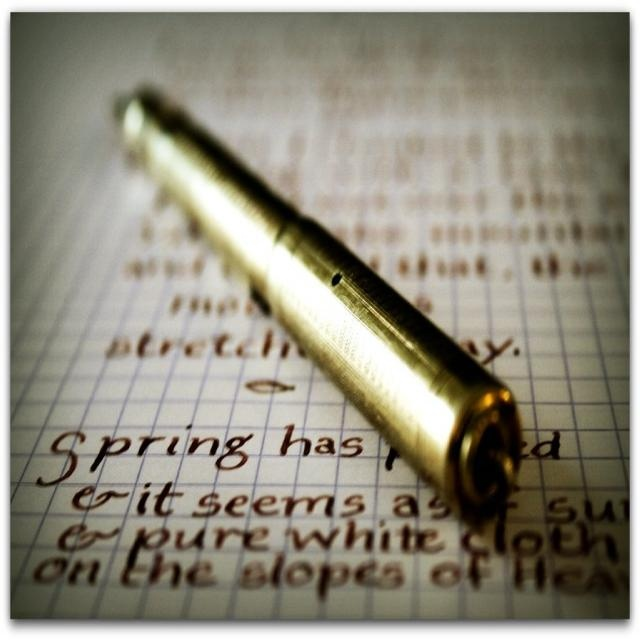

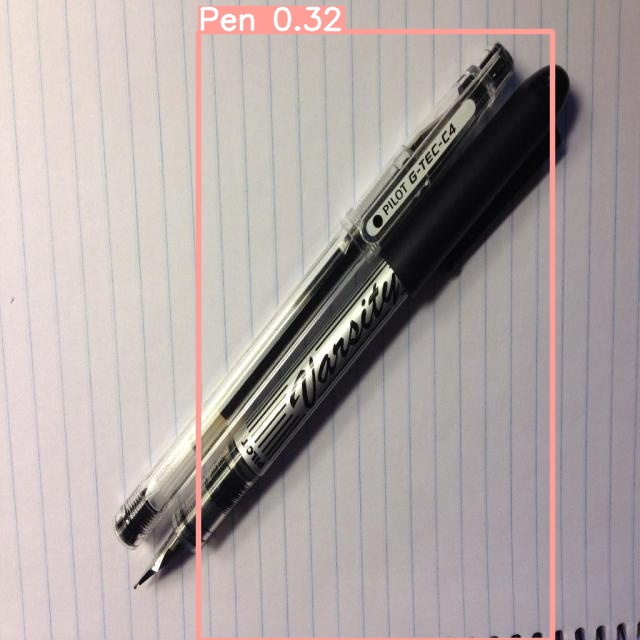

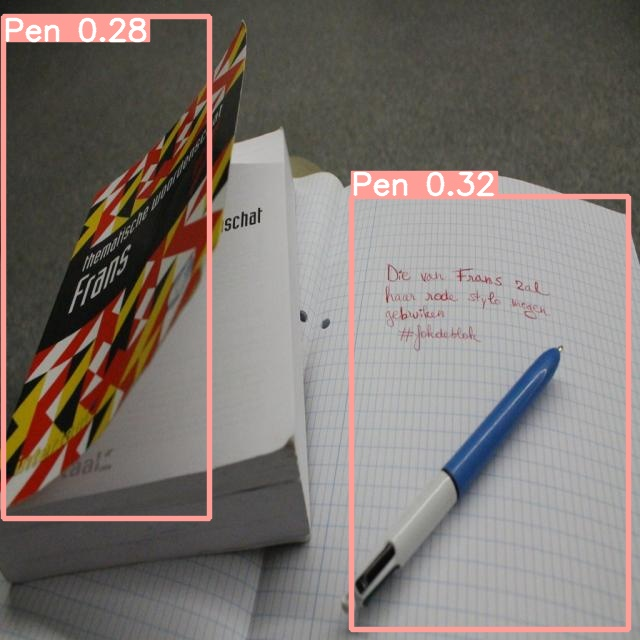

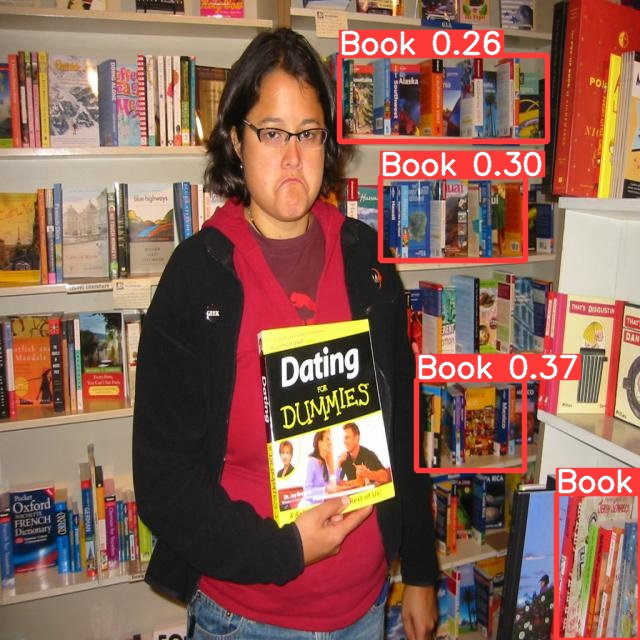

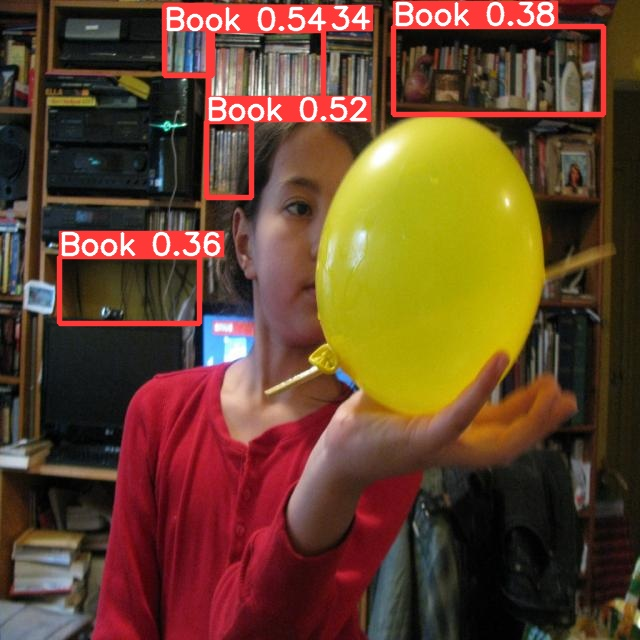

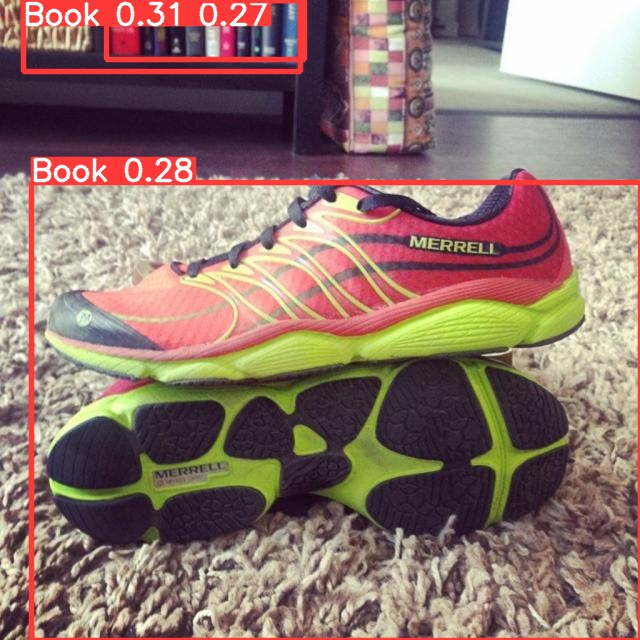

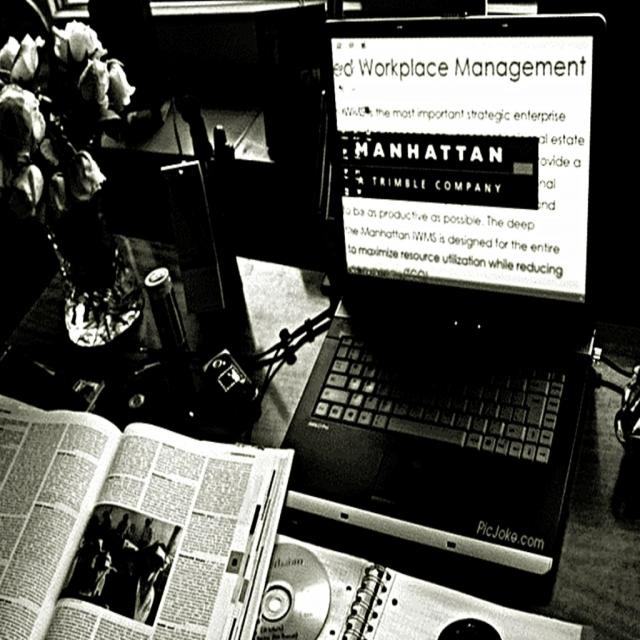

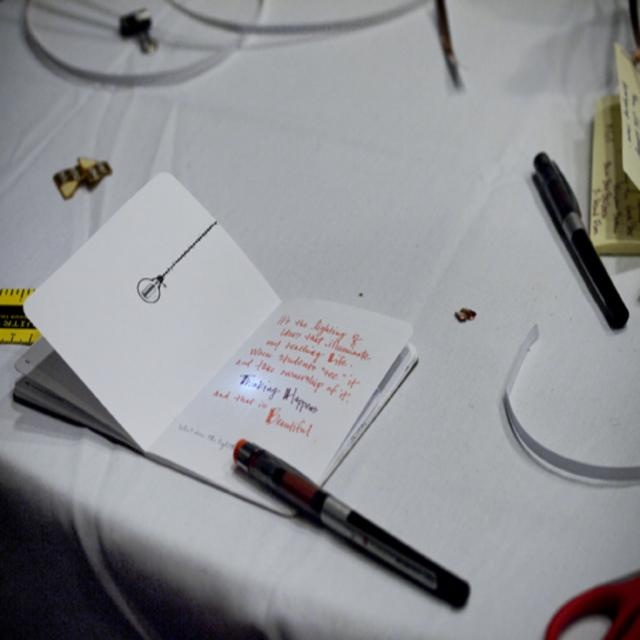

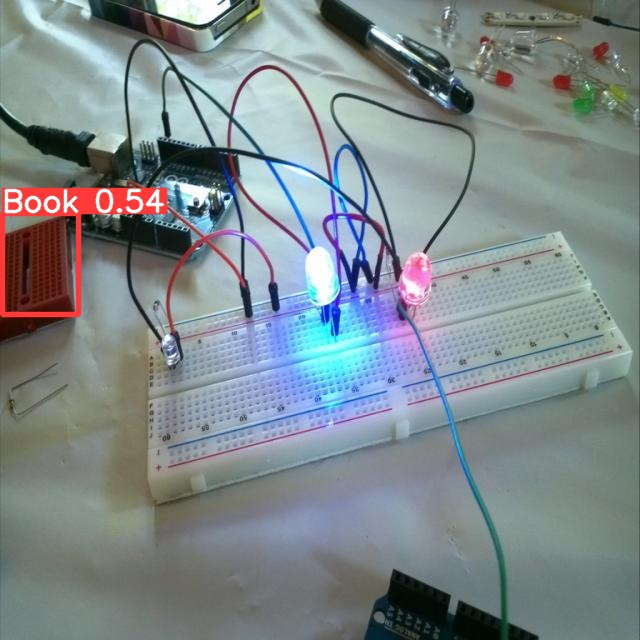

In [50]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[1:10]:
      display(Image(filename=image_path, width=600))
      print("\n")